<a href="https://colab.research.google.com/github/golfn123/CE888Project/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lab3

In [46]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix, f1_score
from sklearn.dummy import DummyRegressor, DummyClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter=";")
df

age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]

In [3]:
df.info

<bound method DataFrame.info of        age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 21 columns]>

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#find imbalance
df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [7]:
df=df.drop('duration',axis=1) #drop column duration
df

age          job  marital  ... euribor3m nr.employed    y
0       56    housemaid  married  ...     4.857      5191.0   no
1       57     services  married  ...     4.857      5191.0   no
2       37     services  married  ...     4.857      5191.0   no
3       40       admin.  married  ...     4.857      5191.0   no
4       56     services  married  ...     4.857      5191.0   no
...    ...          ...      ...  ...       ...         ...  ...
41183   73      retired  married  ...     1.028      4963.6  yes
41184   46  blue-collar  married  ...     1.028      4963.6   no
41185   56      retired  married  ...     1.028      4963.6   no
41186   44   technician  married  ...     1.028      4963.6  yes
41187   74      retired  married  ...     1.028      4963.6   no

[41188 rows x 20 columns]

In [8]:
le_y = LabelEncoder() #transfrom label into numberical value usinig Labelencoder
le_y.fit(df.y)
df.y=le_y.transform(df['y'])
df

age          job  marital  ... euribor3m nr.employed  y
0       56    housemaid  married  ...     4.857      5191.0  0
1       57     services  married  ...     4.857      5191.0  0
2       37     services  married  ...     4.857      5191.0  0
3       40       admin.  married  ...     4.857      5191.0  0
4       56     services  married  ...     4.857      5191.0  0
...    ...          ...      ...  ...       ...         ... ..
41183   73      retired  married  ...     1.028      4963.6  1
41184   46  blue-collar  married  ...     1.028      4963.6  0
41185   56      retired  married  ...     1.028      4963.6  0
41186   44   technician  married  ...     1.028      4963.6  1
41187   74      retired  married  ...     1.028      4963.6  0

[41188 rows x 20 columns]

In [16]:
df_dummies = pd.get_dummies(df)

In [18]:
df_dummies

age  campaign  ...  poutcome_nonexistent  poutcome_success
0       56         1  ...                     1                 0
1       57         1  ...                     1                 0
2       37         1  ...                     1                 0
3       40         1  ...                     1                 0
4       56         1  ...                     1                 0
...    ...       ...  ...                   ...               ...
41183   73         1  ...                     1                 0
41184   46         1  ...                     1                 0
41185   56         2  ...                     1                 0
41186   44         1  ...                     1                 0
41187   74         3  ...                     0                 0

[41188 rows x 63 columns]

In [20]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   y                              41188 non-null  int64  
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

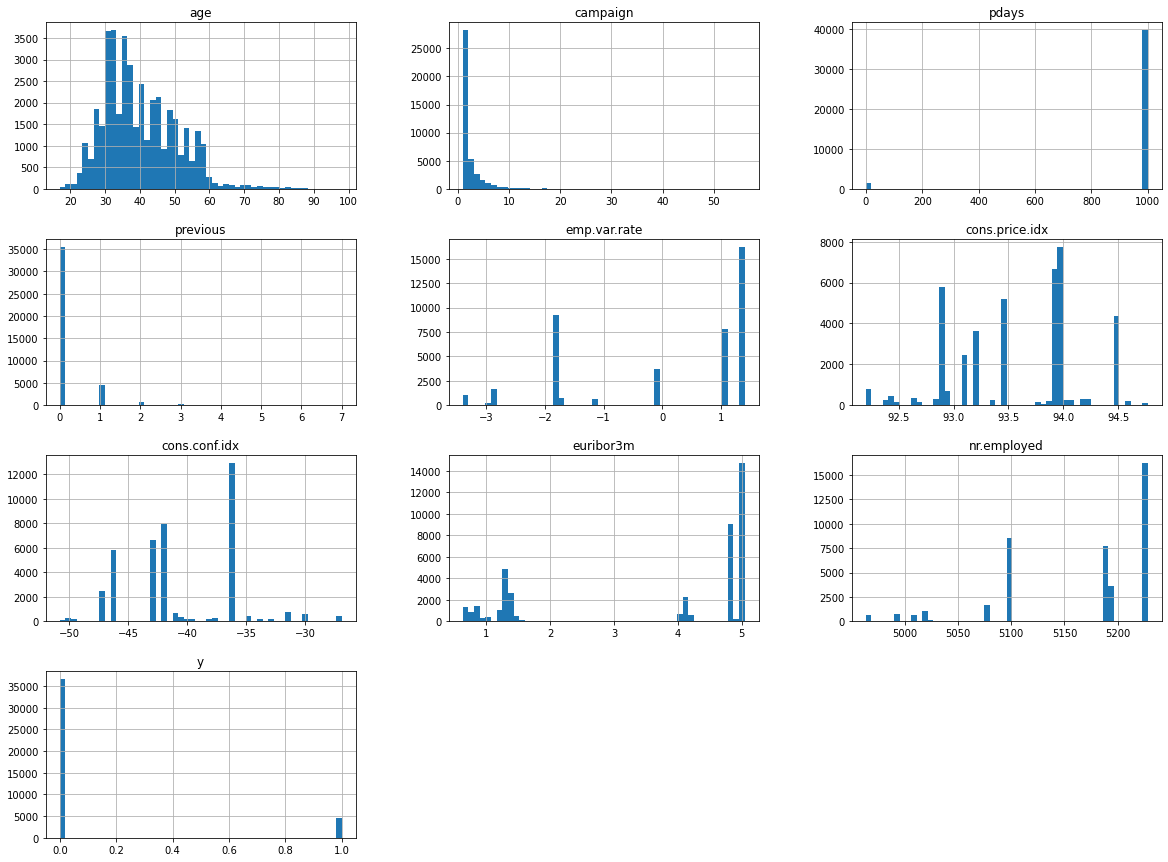

In [25]:
_ = df.hist(bins=50, figsize=(20,15)) #plot histogram

In [29]:
# Create separate training and test sets.
train_set, test_set = train_test_split(df_dummies, test_size=0.2, random_state=50, stratify=df_dummies.y)  
# by setting a random_state above, we make sure anytime we run this line we end up with the same train and test sets
print(len(train_set), len(test_set))

32950 8238


In [31]:
features = train_set.drop('y',axis=1)
feature_test = test_set.drop('y',axis=1)
features

age  campaign  ...  poutcome_nonexistent  poutcome_success
38445   22         3  ...                     0                 1
17713   36         1  ...                     1                 0
30309   37         1  ...                     1                 0
25951   38         2  ...                     1                 0
29064   41         3  ...                     1                 0
...    ...       ...  ...                   ...               ...
11470   37         1  ...                     1                 0
18260   43         4  ...                     1                 0
141     56         1  ...                     1                 0
19789   47         1  ...                     1                 0
7742    33         7  ...                     1                 0

[32950 rows x 62 columns]

In [32]:
outcome = train_set['y']
outcome_test = test_set['y']
outcome_test

10868    0
29141    0
23977    0
33175    0
19349    0
        ..
36916    0
34585    0
17268    0
3556     0
22303    0
Name: y, Length: 8238, dtype: int64

In [35]:
clf_N3 = RandomForestClassifier(max_depth=3, n_estimators=100) #random forest with max depth equals 3
scores = cross_val_score(clf_N3, features, outcome, cv=10, scoring='f1')  # cross-validation
print(scores.mean(), scores.std())


0.2450427565502508 0.03868822786411083


In [38]:
clf_N8 = RandomForestClassifier(max_depth=8, n_estimators=100) #random forest with max depth equals 8
scores= cross_val_score(clf_N8, features, outcome, cv=10, scoring='f1')  # cross-validation
print(scores.mean(), scores.std())

0.3054128252362656 0.04186161235790235


In [44]:
clf_N6 = RandomForestClassifier(max_depth=6, n_estimators=100, random_state=60) #random forest with max depth equals 6
clf_N6.fit(features,outcome)
predicted_outcome=clf_N6.predict(feature_test)

In [47]:
f1_score(outcome_test, predicted_outcome)

0.3105175292153589

In [52]:
clf_N12 = RandomForestClassifier(max_depth=12, n_estimators=200, random_state=60) #random forest with max depth equals 12
clf_N12.fit(features, outcome)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=60)

In [53]:
# Let's see the feature importances for our classifier
importances = clf_N12.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_N12.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

[ 7  8 61  2  4  0  6  5  3  1 59 52 60 49 43 50 42 55 31 38 36 56 23 54
 57 22 44 28 58  9 39 10 14 41 18 30 33 48 27 17 21 25 53 34 32 16 13 26
 15 19 47 51 45 40 12 37 20 11 46 24 29 35]


In [64]:
feat_names = features.columns
feat_names

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [65]:
# Print the feature ranking
print("Feature ranking:")
for f in range(features.shape[1]):
    print("%d. %s (%f)" % (f + 1, feat_names[indices[f]],  importances[indices[f]]))

Feature ranking:
1. euribor3m (0.134903)
2. nr.employed (0.113001)
3. poutcome_success (0.073632)
4. pdays (0.072051)
5. emp.var.rate (0.061818)
6. age (0.061694)
7. cons.conf.idx (0.059789)
8. cons.price.idx (0.049287)
9. previous (0.027366)
10. campaign (0.026380)
11. poutcome_failure (0.015341)
12. month_oct (0.013673)
13. poutcome_nonexistent (0.013397)
14. month_mar (0.013170)
15. contact_telephone (0.012478)
16. month_may (0.012297)
17. contact_cellular (0.012051)
18. day_of_week_mon (0.010214)
19. education_university.degree (0.008837)
20. housing_yes (0.008389)
21. housing_no (0.008259)
22. day_of_week_thu (0.008136)
23. marital_single (0.007804)
24. day_of_week_fri (0.007746)
25. day_of_week_tue (0.007494)
26. marital_married (0.007340)
27. month_apr (0.007256)
28. education_high.school (0.007118)
29. day_of_week_wed (0.006884)
30. job_admin. (0.006854)
31. loan_no (0.006776)
32. job_blue-collar (0.006757)
33. job_retired (0.006356)
34. loan_yes (0.006305)
35. job_technician (